In [96]:
import pandas as pd 
import sklearn 
import joblib 
import matplotlib.pyplot as plt 

In [97]:
pd.set_option("display.max_columns",None)

In [98]:
sklearn.set_config(transform_output="pandas")

In [99]:
train_df=pd.read_csv("C:/Users/abhinavpc/Desktop/flask_course_ml_project/data/train.csv")
val_df=pd.read_csv("C:/Users/abhinavpc/Desktop/flask_course_ml_project/data/val.csv")
test_df=pd.read_csv("C:/Users/abhinavpc/Desktop/flask_course_ml_project/data/test.csv")


In [100]:
train_df.head()
train_df.shape

(640, 10)

In [101]:
val_df.head()
val_df.shape 

(160, 10)

In [102]:
test_df.head()
test_df.shape

(200, 10)

In [103]:
# spliting the data
def split(data):
    X=data.drop('price',axis=1)
    y=data['price']
    return(X,y)

In [104]:
X_train, y_train = split(train_df)

In [105]:
X_train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info
0,Jet Airways,2019-06-21,Mumbai,Hyderabad,10:20:00,11:50:00,90,0.0,In-flight meal not included
1,Air India,2019-05-18,Delhi,Cochin,09:00:00,07:40:00,1360,1.0,No Info
2,Air India,2019-06-12,Kolkata,Banglore,09:10:00,11:05:00,1555,2.0,No Info
3,Vistara,2019-04-01,Kolkata,Banglore,20:20:00,22:55:00,1595,1.0,No Info
4,Vistara,2019-06-06,Kolkata,Banglore,17:00:00,10:45:00,1065,1.0,No Info
...,...,...,...,...,...,...,...,...,...
635,Air Asia,2019-04-12,Banglore,Delhi,04:55:00,07:45:00,170,0.0,No Info
636,Jet Airways,2019-05-09,Kolkata,Banglore,09:35:00,21:05:00,690,1.0,No Info
637,Indigo,2019-05-15,Banglore,Delhi,06:05:00,08:50:00,165,0.0,No Info
638,Multiple Carriers,2019-05-15,Delhi,Cochin,08:45:00,21:00:00,735,1.0,No Info


In [106]:
y_train

0       4995
1       8372
2       6117
3       7770
4       9187
       ...  
635     4282
636    13067
637     4423
638     7670
639    10844
Name: price, Length: 640, dtype: int64

In [107]:
X_val,y_val=split(val_df)


In [108]:
print(X_val.shape)

(160, 9)


In [109]:
X_test,y_test=split(test_df)

In [148]:
print(X_test.shape)
print(y_test.shape)
y_test

(200, 9)
(200,)


0      18916
1      10262
2       9646
3      14641
4       9794
       ...  
195     4174
196    10261
197     2227
198    10262
199     4049
Name: price, Length: 200, dtype: int64

In [111]:
# data information 
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          640 non-null    object 
 1   date_of_journey  640 non-null    object 
 2   source           640 non-null    object 
 3   destination      640 non-null    object 
 4   dep_time         640 non-null    object 
 5   arrival_time     640 non-null    object 
 6   duration         640 non-null    int64  
 7   total_stops      640 non-null    float64
 8   additional_info  640 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 45.1+ KB


In [112]:
# Data preprocessing 
num_col=['duration','total_stops'] 
dt_col=['dep_time','arrival_time','date_of_journey'] 
cat_col=[i for i in X_train.columns if (i not in num_col) and (i not in dt_col)]

In [113]:
cat_col

['airline', 'source', 'destination', 'additional_info']

In [114]:
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler,OneHotEncoder 
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer 

In [115]:
num_pipe=Pipeline(steps=[("imputer",SimpleImputer(strategy='median')),("scaler",StandardScaler())])
cat_pipe=Pipeline(steps=[("imputer",SimpleImputer(strategy='most_frequent')),("scaler",OneHotEncoder(sparse_output=False))])

In [116]:
#preprocessor=ColumnTransformer(transformers=[('num',num_pipe,num_col),('cat',cat_pipe,cat_col)])

In [117]:
# for date and time column 
from feature_engine.datetime import DatetimeFeatures 
doj_pip=Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                        ('extractor',DatetimeFeatures(features_to_extract=['month','week','day_of_week','day_of_month'],format='mixed')),
                        ('scaler',StandardScaler())]) 
time_pip=Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                        ('extractor',DatetimeFeatures(features_to_extract=['hour','minute'],format='mixed')),
                        ('scaler',StandardScaler())])

In [118]:
preprocessor=ColumnTransformer(transformers=[('num',num_pipe,num_col),('cat',cat_pipe,cat_col),('doj',doj_pip,['date_of_journey']),('time',time_pip,['dep_time','arrival_time'])])

In [119]:
preprocessor.fit_transform(X_train)

,num__duration,num__total_stops,cat__airline_Air Asia,cat__airline_Air India,cat__airline_Goair,cat__airline_Indigo,cat__airline_Jet Airways,cat__airline_Multiple Carriers,cat__airline_Spicejet,cat__airline_Vistara,cat__source_Banglore,cat__source_Chennai,cat__source_Delhi,cat__source_Kolkata,cat__source_Mumbai,cat__destination_Banglore,cat__destination_Cochin,cat__destination_Delhi,cat__destination_Hyderabad,cat__destination_Kolkata,cat__destination_New Delhi,cat__additional_info_1 Long layover,cat__additional_info_In-flight meal not included,cat__additional_info_No Info,cat__additional_info_No check-in baggage included,doj__date_of_journey_month,doj__date_of_journey_week,doj__date_of_journey_day_of_week,doj__date_of_journey_day_of_month,time__dep_time_hour,time__dep_time_minute,time__arrival_time_hour,time__arrival_time_minute
0,-1.095918,-1.212132,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.151587,1.331443,0.566118,0.963554,-0.462055,-0.140057,-0.345231,1.493859
1,1.435699,0.317975,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.306386,0.375290,1.050498,0.604465,-0.640951,-1.229863,-0.935607,0.891041
2,1.824412,1.848082,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.151587,1.140212,-0.402640,-0.113711,-0.640951,-0.684960,-0.345231,-1.218823
3,1.904148,0.317975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.538816,-0.772093,-1.371399,-1.430369,1.326906,-0.140057,1.278301,1.795268
4,0.847647,0.317975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.151587,0.948982,0.081739,-0.831888,0.790218,-1.229863,-0.492825,1.192450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,-0.936446,-1.212132,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.538816,-0.580863,0.566118,-0.113711,-1.535432,1.767103,-0.935607,1.192450
636,0.100122,0.317975,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.306386,0.184059,0.081739,-0.472800,-0.640951,0.677297,1.130707,-1.218823
637,-0.946413,-1.212132,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.306386,0.375290,-0.402640,0.245377,-1.177640,-0.957412,-0.788013,1.493859
638,0.189825,0.317975,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.306386,0.375290,-0.402640,0.245377,-0.819847,1.222200,1.130707,-1.520232


In [120]:
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor

In [121]:
algorithms= {
    "linear regressor" : LinearRegression(),
    "support vector machine" : SVR(),
    "Random forest regressor" : RandomForestRegressor(n_estimators=10),
    "Xg boost" : XGBRegressor(n_estimators=10)
}

In [122]:
from sklearn.metrics import r2_score 
from sklearn.model_selection import learning_curve
import numpy as np

In [123]:
data=pd.concat([train_df,val_df],axis=0)
data.shape 
X_data, y_data = split(data)
print(X_data.shape)
print(y_data.shape)


(800, 9)
(800,)


In [124]:
def plot_curves(sizes,mean_scores,std_scores,label,ax):
    ax.plot(
        sizes,
        mean_scores,
        marker='o',
        label=label
    ) 
    
    ax.fill_between(
        x=sizes,
        y1=mean_scores-std_scores,
        y2=mean_scores+std_scores,
        alpha=0.5
    )

In [137]:
def plot_learning_curves(name, algorithm, figsize=(12, 4)):
	model = Pipeline(steps=[
		("pre", preprocessor),
		("alg", algorithm)
	])

	train_sizes, train_scores,test_scores = learning_curve(
		estimator=model,
		X=X_data,
		y=y_data,
		cv=3,
		scoring="r2",
		n_jobs=-1,
        random_state=42
		
	)
	
	mean_train_scores = np.mean(train_scores, axis=1)
	std_train_scores = np.std(train_scores, axis=1)
	train_score = f"{mean_train_scores[-1]:.2f} +/- {std_train_scores[-1]:.2f}"

	mean_test_scores = np.mean(test_scores, axis=1)
	std_test_scores = np.std(test_scores, axis=1)
	test_score = f"{mean_test_scores[-1]:.2f} +/- {std_test_scores[-1]:.2f}"

	fig, ax = plt.subplots(figsize=figsize)
    
    # training curve
	plot_curves(
		train_sizes,
		mean_train_scores,
		std_train_scores,
		f"Train ({train_score})",
		ax
	)

	# test curve
	plot_curves(
		train_sizes,
		mean_test_scores,
		std_test_scores,
		f"Test ({test_score})",
		ax
	)

	ax.set(xlabel="Training Set Size", ylabel="R-square", title=name)

	ax.legend(loc="lower right")

	plt.show()


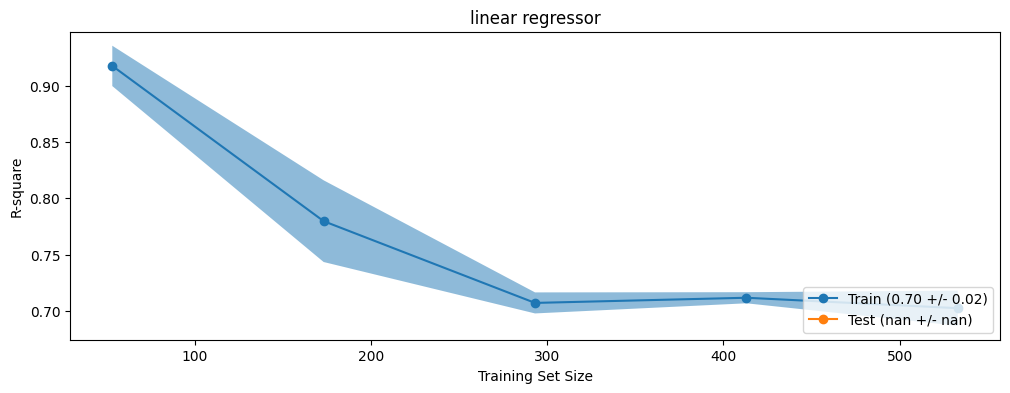

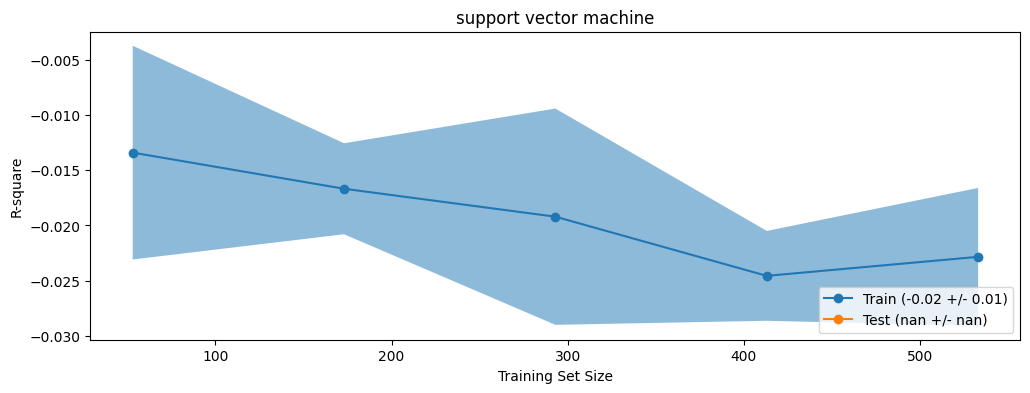

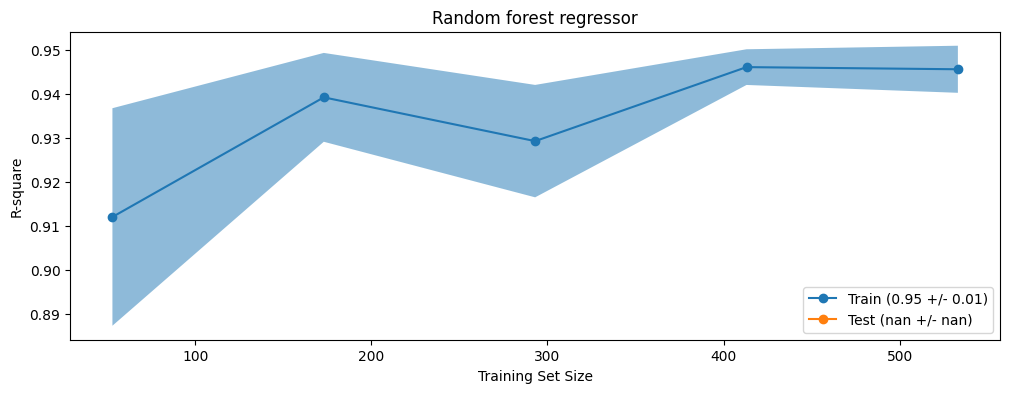

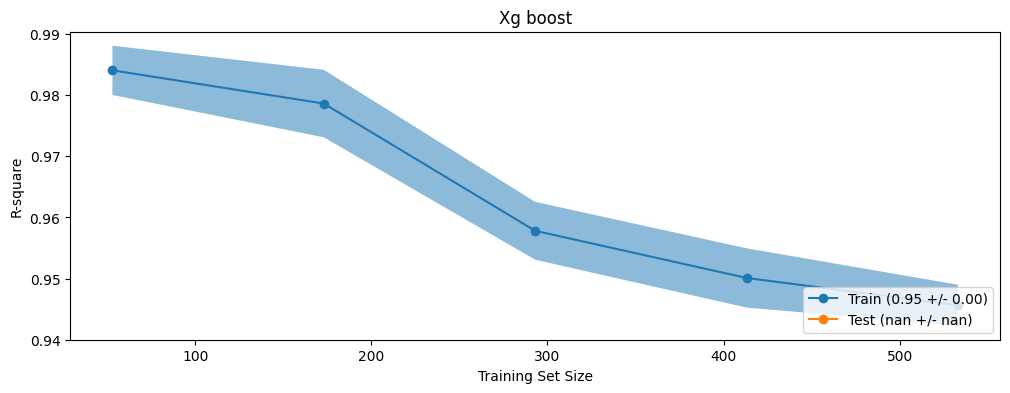

In [138]:
for name, alg in algorithms.items():
	plot_learning_curves(name, alg)
    

In [127]:
# model training 
model=Pipeline(steps=[
      ('pre',preprocessor),
      ('rf',RandomForestRegressor(n_estimators=10))
])

In [128]:
model.fit(X_data, y_data)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'total_stops']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['airline', 'source',
                                                   'destination',
                                                   'additional_...
                                                                                                         'day_of_month'],
                                                                                    format='mixed')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['date_of_journey']),
                                                 ('time',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('extractor',
                                                                   DatetimeFeatures(features_to_extract=['hour',
                                                                                                         'minute'],
                                                                                    format='mixed')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['dep_time',
                                                   'arrival_time'])])),
                ('rf', RandomForestRegressor(n_estimators=10))])

In [130]:
# model evaluation 
def eva_model(X,y):
    y_pred=model.predict(X)
    return r2_score(y, y_pred)

In [132]:
print(f"R2 score on Training data is = {eva_model(X_data, y_data)}")

R2 score on Training data is = 0.9571872068190208


In [133]:
print(f"R2 score on Test data is = {eva_model(X_test, y_test)}")

R2 score on Test data is = 0.7202199238298939


In [139]:
joblib.dump(model,'model.joblib')

['model.joblib']

In [140]:
saved_model=joblib.load('model.joblib')

In [141]:
saved_model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'total_stops']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['airline', 'source',
                                                   'destination',
                                                   'additional_...
                                                                                                         'day_of_month'],
                                                                                    format='mixed')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['date_of_journey']),
                                                 ('time',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('extractor',
                                                                   DatetimeFeatures(features_to_extract=['hour',
                                                                                                         'minute'],
                                                                                    format='mixed')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['dep_time',
                                                   'arrival_time'])])),
                ('rf', RandomForestRegressor(n_estimators=10))])

In [142]:
y_pred=saved_model.predict(X_test)

In [156]:
y_pred=y_pred.astype(int)
y_pred

array([14441, 11292, 11264, 10190,  8345,  8868,  4180,  8502, 10682,
        5931,  8167,  5888, 10525,  7983, 10313,  4477, 10293,  6213,
        2703, 11529,  9739, 10370,  5398, 14795, 12552, 12803, 18426,
        9760, 10758,  5806,  8286,  4671,  9101, 17539,  6508,  4966,
        4502,  5788,  7244,  6752, 14537, 10410,  6764,  9151, 17190,
        4897,  8592,  6579, 10235,  4921, 13799,  9043,  8016,  6942,
        3881,  9641,  5685,  3903, 16074,  9925,  3142,  6453, 10400,
        6718,  9508,  9301,  2647,  9412,  9948,  9369,  4305, 11769,
        6593, 14127, 10357,  4316, 10700, 13643, 16115,  3865,  4529,
       10865, 10473,  4219, 11999, 10272,  4395,  7997, 10384, 14371,
        4572,  5838,  6020,  7125,  3895,  4344, 10041, 13264, 11441,
       12336,  4193,  4631, 11152,  3541,  6572,  4398, 14487, 11134,
        4873,  5597, 16962, 11263,  3733,  3890,  7653, 12243, 11052,
        5918, 10135,  7858, 15122,  6463,  5089,  5728, 11870,  4183,
        5041,  5064,

In [158]:
r2_score=(y_pred,y_test)
print(r2_score)

(array([14441, 11292, 11264, 10190,  8345,  8868,  4180,  8502, 10682,
        5931,  8167,  5888, 10525,  7983, 10313,  4477, 10293,  6213,
        2703, 11529,  9739, 10370,  5398, 14795, 12552, 12803, 18426,
        9760, 10758,  5806,  8286,  4671,  9101, 17539,  6508,  4966,
        4502,  5788,  7244,  6752, 14537, 10410,  6764,  9151, 17190,
        4897,  8592,  6579, 10235,  4921, 13799,  9043,  8016,  6942,
        3881,  9641,  5685,  3903, 16074,  9925,  3142,  6453, 10400,
        6718,  9508,  9301,  2647,  9412,  9948,  9369,  4305, 11769,
        6593, 14127, 10357,  4316, 10700, 13643, 16115,  3865,  4529,
       10865, 10473,  4219, 11999, 10272,  4395,  7997, 10384, 14371,
        4572,  5838,  6020,  7125,  3895,  4344, 10041, 13264, 11441,
       12336,  4193,  4631, 11152,  3541,  6572,  4398, 14487, 11134,
        4873,  5597, 16962, 11263,  3733,  3890,  7653, 12243, 11052,
        5918, 10135,  7858, 15122,  6463,  5089,  5728, 11870,  4183,
        5041,  5064